# Plotting Time Series Data
A time series plot, also known as a time plot, is a graph that displays data points collected in a time sequence. The x-axis represents the time, and the y-axis represents the variable being measured.

In [1]:
# importing packages
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import pandas as pd
from datetime import datetime, timedelta

In [2]:
# first let's undestand with manually created data
dates = [
    datetime(2019, 5, 24),
    datetime(2019, 5, 25),
    datetime(2019, 5, 26),
    datetime(2019, 5, 27),
    datetime(2019, 5, 28),
    datetime(2019, 5, 29),
    datetime(2019, 5, 30)
]
y = [0, 1, 3, 4, 6, 5, 7]

### Simple Time plot
To plot these dates we can simply use `plt.plot(x,y)`

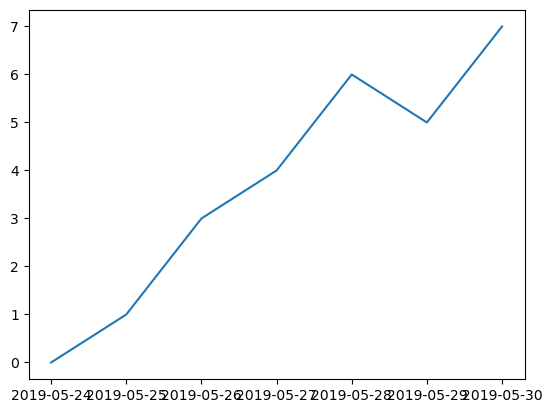

In [3]:
plt.plot(dates,y)

We can see above that the x axis is congested, using `plt.tight_layout` improves this a bit however it is still not good enough.<br>
We will use **`plt.gcf()`** which takes the current figure and the we will apply **`.autofmt_xdate()`** which auto formats the x-axis.

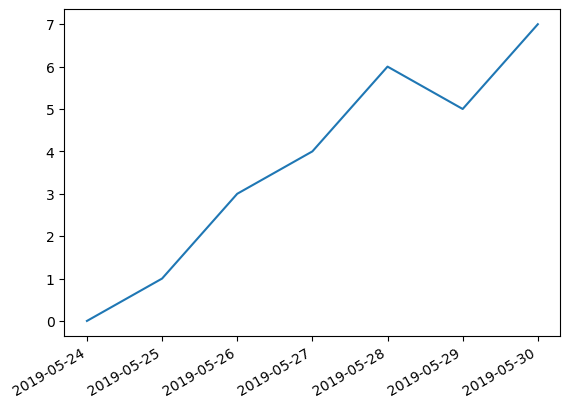

In [4]:
plt.plot(dates,y)
plt.gcf().autofmt_xdate()
plt.show()

### Format Date Label
If we wanted to format the date labels such as changing from yyyy/mm/dd to Month/dd/yyyy, etc we will use the matplotlib.dates module in that we will use the date formater class.<br>
Follow the link to learn more about [Python Datetime Module](https://www.youtube.com/watch?v=eirjjyP2qcQ).<br>
Follow this link to know more about the [Python Documentation for Datetime Format Codes](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)<br>
- First Create an instance of that class with the desired format.
- **`matplotlib.dates.DateFormatter('%b, %d %Y')`**
- Get the current axis using `plt.gca()`
- Then apply the method `.axis.set_major_formatter(format)` on the axis you selected in the previous step with the format as it's parameter.
- **`plt.gca().xaxis.set_major_formatter(format)`**

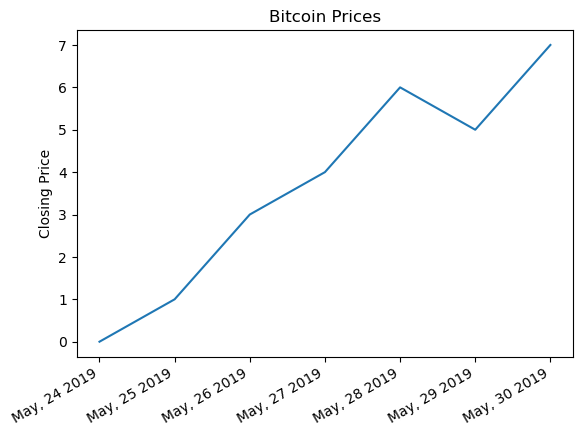

In [5]:
plt.plot(dates,y)
plt.gcf().autofmt_xdate()
date_format=mpl_dates.DateFormatter('%b, %d %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.title('Bitcoin Prices')
plt.ylabel('Closing Price')
plt.show()

### Working with Real Life Data
This is a bitcoin data of starting, closing, high and low price for everyday 

In [6]:
df=pd.read_csv('.\data\data08.csv')

price_date = df['Date']
price_close = df['Close']

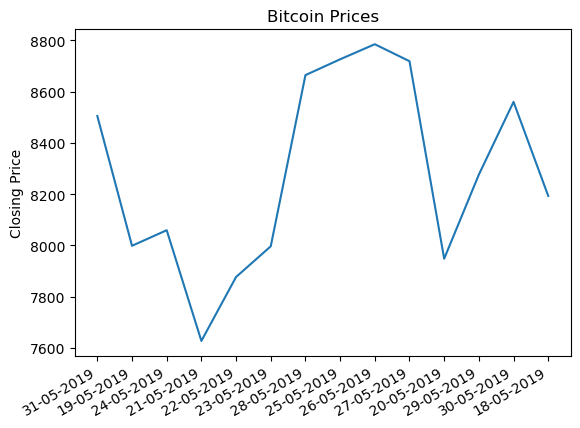

In [7]:
plt.plot(price_date,price_close)
plt.gcf().autofmt_xdate()
plt.title('Bitcoin Prices')
plt.ylabel('Closing Price')
plt.show()

If we notice carefull it can be seen that the dates are not in proper order. This is because they are currently not set as datetime objects instead they are just strings.

In [8]:
type(price_date[9])

str

To fix this we have to convert them to datetime using a pandas method called **`pd.to_datetime(column)`** which converts those values to date time objects. <br>
Note: The function doesn't apply the changes inplace.

In [9]:
df['Date']=pd.to_datetime(df['Date'])
price_date = df['Date']

C:\Users\Simon\AppData\Local\Temp\ipykernel_9660\4108383066.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date']=pd.to_datetime(df['Date'])


In [10]:
type(price_date[9])

pandas._libs.tslibs.timestamps.Timestamp

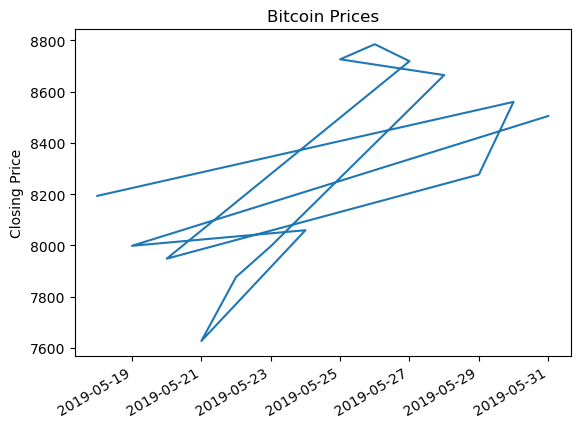

In [11]:
plt.plot(price_date,price_close)
plt.gcf().autofmt_xdate()
plt.title('Bitcoin Prices')
plt.ylabel('Closing Price')
plt.show()

As we can see the plot line now follows the dates in order however since we haven't yet arranged them in order it looks wrong.
Because the axis recognises it as datetime and rearranges the x-axis values however the values are still passed in the wrong order as in the data.<br>
Sort the data by date to fix this.

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
# sort by date
df.sort_values('Date', inplace=True)

price_date = df['Date']
price_close = df['Close']

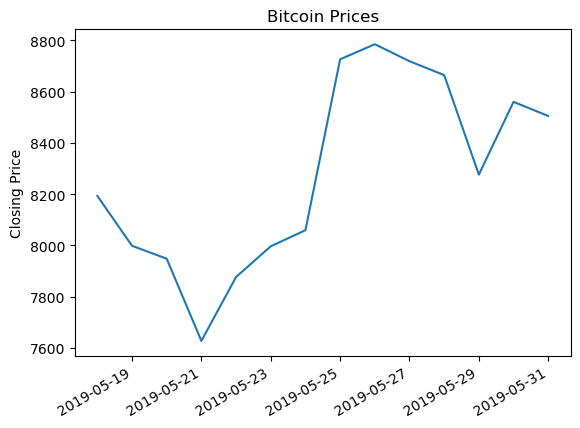

In [13]:
plt.plot(price_date,price_close)
plt.gcf().autofmt_xdate()
plt.title('Bitcoin Prices')
plt.ylabel('Closing Price')
plt.show()

22-11-2023<br>
\- Simon Nadar